## Fintech - Assignment 2

The aim of this assignment is to build a 'toy robo-adviser' that computes, based on a set of external inputs, the optimal portfolio for a person. We will then compare our results to a real world robo-advisor, offered by Six Park\*.

\* Six Park's robo-advisor has been selected purely for pedagogical reasons and should not be interpreted as promotion or endorsement from the University of Melbourne. This assignment will not require you to follow through with the use of their product or to invest with them.


### Import your packages in the cell below

In [ ]:
import scipy.optimize as sco
import scipy.stats as scs
import numpy as np
import pandas as pd

import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Question 1 (1 mark)

#### Question 1 - Markdown <span style="color:blue">[1 mark]</span>

**Do you agree with Six Park's claim that all else equal, younger investors are more willing to take risk than older investors? Support your answer with one reason based on portfolio theory, as discussed in class, and a second reason based on the findings of Zilker et al.'s 2020 paper "Age differences in risk attitude are shaped by option complexity."  (Strict) Word limit: 100 words.**

**Solution**

Six Park's claim that risk aversion increases with age is dubious. Portfolio theory assumes investors have a particular level of risk aversion, but it makes no claim that this is influenced by age. Instead, investment time horizon is a more relevant determinant of risk preferences. Zilker et al. (2020) show that the wide-held belief that risk aversion increases with age may be a misconception, as previous studies did not account for the role of complexity in risk preference. Older investors are more complexity-averse and risky investments are generally more complex than risk free investments.



## Question 2 (1.5 marks)

#### Question 2 (i) - Markdown <span style="color:blue">[0.5 marks]</span>

**Sign up for advice with Six Park at https://app.sixpark.com.au/assessment. You will need to:**

1. **Click `Get started`**
1. **Enter your name and email address**
1. **Click `I confirm and want to proceed`**
1. **Select you are investing for `Myself` and click `Start`**

**You will then be asked 10 assessment questions. List which of these 10 questions can be considered risk elicitation questions, as defined in lectures. If all, respond all. If none, state which question is most similar to a risk elicitation question. (Strict) Word limit: 20 words.**

**Solution**

None of the questions ask people to choose between gambles or scenarios, so they are not as defined in lectures.

#### Question 2 (ii) - Markdown <span style="color:blue">[1 mark]</span>

**Is Six Park's assessment sufficient to accurately estimate an investor's level of risk aversion, as required for portfolio separation? Give two reasons to support your answer. (Strict) Word limit: 60 words.**

**Solution**

Six Park's assessment appears insufficient to accurately estimate an investor's level of risk aversion.
* It is unclear how the answers to Six Park's questions are linked to portfolio theory, that is, whether they are related to risk aversion.  
* The questions don't appear to be able to elicit a quantitative measure of risk aversion, as required by portfolio theory.


## Question 3 (0.5 marks)

#### Question 3 (i) - Markdown <span style="color:blue">[0.25 marks]</span>

**Enter in the following as your answers to Six Parks' assessment questions.**

1. **18-25 years**
1. **Highly Stable**
1. **More than 30%**
1. **\$500,000 or more**
1. **\$1 million or more**
1. **More than 20 years**
1. **Invest more money in the markets**
1. **I want to take high risks...**
1. **Mostly concerned with potential gains on the investment**
1. **I am highly experienced...**

**Select "Prefer Sustainable?". You should receive advice for the Sustainable Aggressive Growth portfolio. Assume Six Park does not consider any of the recommended assets as risk-free. Complete the below table with the asset allocation of the optimal RISKY portfolio, as advised by Six Park. Each answer should be to 2 decimal places.**

| Asset name                         | % of risky portfolio |
|------------------------------------|----------------------|
| Emerging Markets                   |       %              |
| Global Listed Property             |       %              |
| Australian Equities                |       %              |
| Intl Equities (Unhedged)           |       %              |
| Intl Equities (Hedged)             |       %              |
| Global Infrastructure              |       %              |
| Bond/Fixed Income                  |       %              |
|**Total**                           |         100%         |

**Solution**

| Asset name                         | % of risky portfolio |
|------------------------------------|----------------------|
| Emerging Markets                   |        0.00%         |
| Global Listed Property             |       10.00%         |
| Australian Equities                |       27.50%         |
| Intl Equities (Unhedged)           |       35.00%         |
| Intl Equities (Hedged)             |       12.50%         |
| Global Infrastructure              |       10.00%         |
| Bond/Fixed Income                  |       5.00%          |
|**Total**                           |         100%         |

#### Question 3 (ii) - Code <span style="color:blue">[0.25 marks]</span>

**Use the target asset allocation for the Sustainable Aggressive Growth portfolio and the information on https://www.sixpark.com.au/our-selected-etfs/ to determine which specific ETFs Six Park is recommending investment in. Find the relevant tickers for these ETFs in Yahoo Finance [note: the ticker provided by Six Park may not match the ticker in Yahoo Finance]. Create a new variable `initial_ticker_list`, which should be a python list storing the Yahoo Finance tickers you have found as `str` elements.**

In [ ]:
# solution
initial_ticker_list = ['E200.AX', 'VESG.AX', 'HETH.AX', 'DJRE.AX', 'IFRA.AX', 'IAF.AX']

## Question 4 (3 marks)

#### Question 4 (i) - Code <span style="color:blue">[0.5 marks]</span>

**Complete the following tasks in python:**

1. **Use the Yahoo Finance API to load daily ETF price data from 1 July 2016 to 30 June 2021 for each of the stocks provided in `ticker_list` below.**
1. **Convert the daily price data into daily returns.**

In [ ]:
ticker_list = ['STW.AX', 'VGS.AX', 'VGAD.AX', 'DJRE.AX', 'IFRA.AX', 'AAA.AX', 'IAF.AX']

# solution

# download data for each stock
df_list = list()
for ticker in ticker_list:
    data = yf.download(ticker, start="2016-07-01", end="2021-06-30", group_by="Ticker", period='1d')
    data['ticker'] = ticker  # add this column becasue the dataframe doesn't contain a column with the ticker
    df_list.append(data)

# combine all dataframes into a single dataframe
df = pd.concat(df_list)

# remove irrelevant variables
df = df.filter(['Adj Close', 'ticker'])

# re-organise the table
df = df.pivot(columns='ticker')
df.columns = [col[1] for col in df.columns]

# compute daily returns from prices and mean returns
df = df.pct_change()
df = df.iloc[1: , :]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


#### Question 4 (ii) - Code <span style="color:blue">[0.5 marks]</span>

**Complete the following tasks in python:**

1. **Create a new variable `risk_free_rate`, which should store the mean daily return of 'AAA.AX'.**
1. **Delete only the data on 'AAA.AX' from your daily returns dataframe.**
1. **Create a new variable `mean_returns`, which should store the mean daily return of each remaining ETF in your dataframe.**
1. **Create a new variable `cov_matrix`, which should store the covariance matrix of each remaining ETF in your dataframe.**
1. **Plot the daily returns time series from each remaining ETF in your dataframe. Ensure the plot is appropriately labelled.**

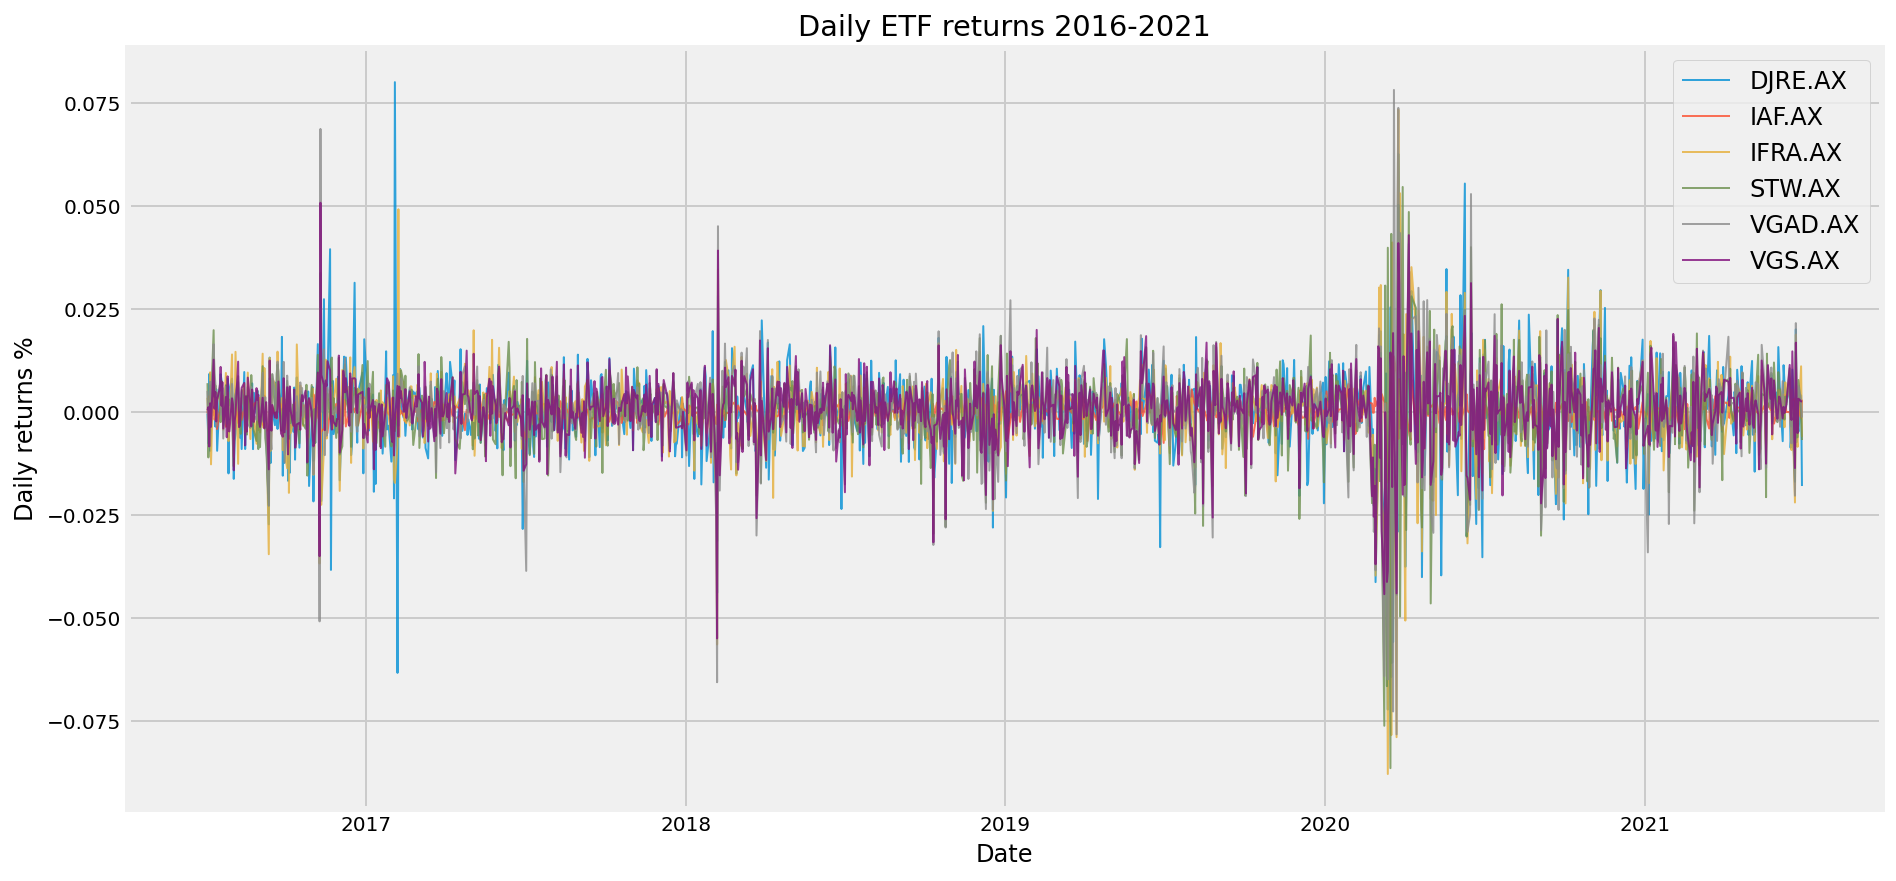

In [ ]:
# solution

# compute risk free rate and drop the asset from the dataframe

risk_free_rate = df["AAA.AX"].mean() * 252 # annualised here. daily without *252 is ok as well
df = df.drop(['AAA.AX'], axis=1)

# compute mean daily returns for the risky assets and build the covariance matrix
mean_returns = df.mean() # means of daily returns
cov_matrix = df.cov() # build return covariance matric

# plot return time series
plt.figure(figsize=(14, 7))
for c in df.columns.values:
    plt.plot(df.index, df[c], lw=1, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('Daily returns %')
plt.xlabel('Date')
plt.title('Daily ETF returns 2016-2021')
plt.show()

#### Question 4 (iii) - Code <span style="color:blue">[1 mark]</span>

**Complete the following tasks in python:**

1. **Compute and plot the efficient frontier. Ensure plots are appropriately labelled and that a minimum of 5\% is invested into each ETF.**
1. **Your plot should mark the location of the Sharpe-optimal risky portfolio. It should NOT mark the location of the minimum variance portfolio.**
1. **Print the asset allocation of the Sharpe-optimal risky portfolio. Do NOT print the asset allocation of the minimum variance portfolio.**

In [ ]:
'''
print the portfolio allocation and plot individual stocks, maximum Sharpe ratio portfolio and
efficient frontier in a graph with annualisd standard deviation on the horizontal axis and
annualised returns on the vertical axis
'''
'''
portfolio performance evaluation function
'''
# define a function that compute annualised return and standard deviation of a portfolio
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

'''
function to compute portfolio volatility
'''
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]


'''
function to compute negative Sharp ratio
'''
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_std, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_std


'''
find minimum variance (volatility) portfolio using optimisation
'''
def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = [0.05,1.0]
    bounds = list(bound for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets * [1. / num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

'''
function to compute maximum Sharpe ratio portfolio using optimisation
'''
def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = [0.05,1.0]
    bounds = list(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets * [1. / num_assets, ], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result


'''
compute efficient portfolio for a given target return
'''
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = list([0.05, 1] for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets * [1.  /num_assets, ], args=args, method='SLSQP',
                          bounds=bounds, constraints=constraints)

    return result


'''
find efficient frontier
'''
def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients


'''
display optimal portfolio
'''
# define function to computing elements of plot and produce plot
def display_calculated_ef(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=mean_returns.index,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i * 100, 3) for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=mean_returns.index,columns=['allocation'])
    min_vol_allocation.allocation = [round(i * 100, 3) for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    an_vol = pd.Series([np.sqrt(i) * np.sqrt(252) for i in np.diag(cov_matrix)], index=mean_returns.index)
    an_rt = mean_returns * 252

    print("-" * 80)
    print("Maximum Sharpe ratio portfolio allocation\n")
    print("Annualised return:", round(rp, 3))
    print("Annualised volatility:", round(sdp, 3))
    print("\n")
    print(max_sharpe_allocation)

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(mean_returns.index):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')

    target = np.linspace(rp_min, 0.109, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)

    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')

    ax.set_title('Portfolio optimisation with individual stocks')
    ax.set_xlabel('Annualised std. deviation %')
    ax.set_ylabel('Annualised returns %')
    ax.legend(labelspacing=0.8, loc='upper left')

--------------------------------------------------------------------------------
Maximum Sharpe ratio portfolio allocation

Annualised return: 0.079
Annualised volatility: 0.09


            DJRE.AX  IAF.AX  IFRA.AX  STW.AX  VGAD.AX  VGS.AX
allocation      5.0  29.164      5.0     5.0      5.0  50.836


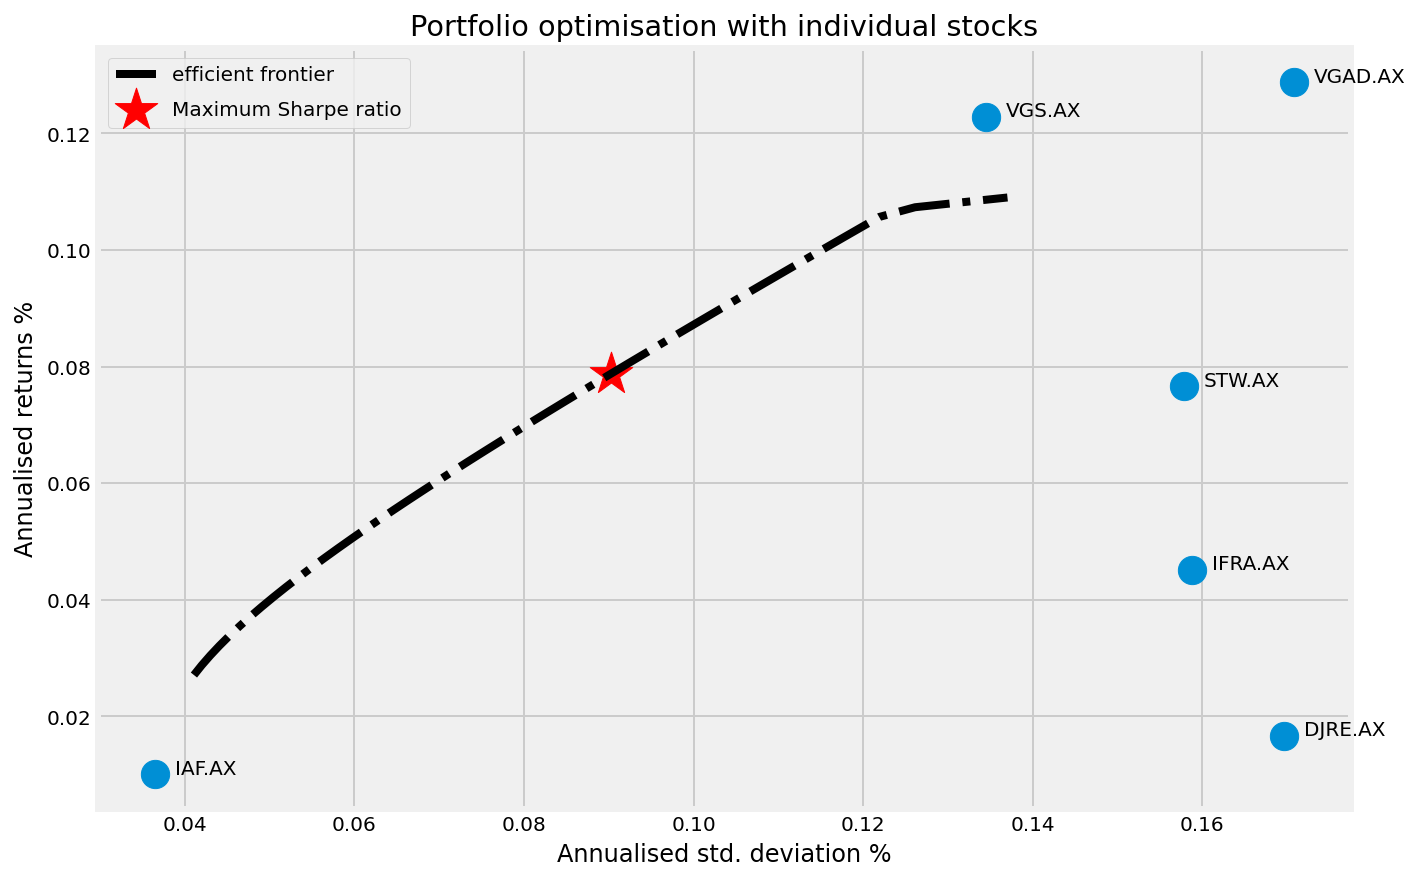

In [ ]:
'''
run the above function
'''
display_calculated_ef(mean_returns, cov_matrix, risk_free_rate)

#### Question 4 (iv) - Markdown <span style="color:blue">[0.5 marks]</span>

**Assume investors follow a mean-variance utility function of the form $U = E(r) - 4\alpha \sigma^2$, where $E(r)$ denotes the annual expected return, $\alpha$ is the risk aversion coefficient and $\sigma^2$ is the annual variance. Let $y$ denote the fraction invested in the optimal risky portfolio $p$. Following portfolio theory, the utility function can then be re-written as: $U = (yE(r_p) + (1-y)r_f) - 4\alpha y^2 \sigma_p^2$. Algebraically, solve for the optimal fraction $y^*$ that should be invested in the risky portfolio.**

**Solution**

$$U = (yE(r_p) + (1-y)r_f) - 4y^2 \alpha \sigma_p^2$$

$$\frac{\partial U}{\partial y} = E(r_p) - r_f - 8y\alpha \sigma_p^2 = 0$$

$$y^* = \frac{E(r_p) - r_f}{8\alpha \sigma_p^2}$$

#### Question 4 (v) - Code <span style="color:blue">[0.5 marks]</span>

**Assume that for all investors $\alpha=1.7$. Complete the following tasks in python:**

1. **Calculate and print the weight an investor should allocate to the optimal risky portfolio. Each answer should be to 2 decimal places.**
1. **Calculate and print the weight an investor should allocate to the risk-free asset. Each answer should be to 2 decimal places.**

In [ ]:
def find_complete_portfolio(mean_returns, cov_matrix, risk_free_rate, alpha):
    """
    find optimal complete portfolio

    :mean_returns: mean stock returns (series of floats)
    :cov_matrix: stock covariances (df of floats)
    :risk_free_rate: annualised risk-free rate (float)
    :alpha: investor risk aversion coefficient (float)

    :return: function should return two variables, weight_risky and weight_risk_free, in this order:
    1: weight_risky: the weight an investor should allocate to the optimal risky portfolio (float)
    2: weight_risk_free: an investor should allocate to the risk-free rate (float)
    Both weights must be expressed as a percentage
    """

    # Write your code here


    # solution
    # compute annual return and std dev of optimal risky portfolio
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)

    # compute and print weight in risky portfolio and risk-free asset
    weight_risky = ((rp-risk_free_rate)/(8*alpha*sdp**2)) * 100
    weight_risk_free = 100 - weight_risky
    # end solution

    # DO NOT edit the below line
    return round(weight_risky,2), round(weight_risk_free,2)


# solution
# you must run your function here
find_complete_portfolio(mean_returns, cov_matrix, risk_free_rate, 1.7)

(71.04, 28.96)

## Question 5 (2 marks)

#### Question 5 (i) - Markdown <span style="color:blue">[0.25 marks]</span>

**Re-do the assessment questions, entering in the following as your answers:**

1. **18-25 years**
1. **Highly Stable**
1. **More than 30%**
1. **\\$75,000 to \\$149,999**
1. **\\$1 to \\$124,999**
1. **Within 3 years**
1. **Sell all of the investments**
1. **I want to play it safe...**
1. **Mostly concerned with potential losses on the investment**
1. **I am highly experienced...**

**Do NOT select "Prefer Sustainable?". You should receive advice for the Conservative Balanced portfolio. Assume that Six Park considers the 'Cash Yield' asset to be the only risk-free asset and that their advice is for the optimal complete portfolio. Complete the below table with the asset allocation of the optimal RISKY portfolio, as advised by Six Park. Each answer should be to 2 decimal places.**

| Asset name                         | % of risky portfolio |
|------------------------------------|----------------------|
| Emerging Markets                   |       %         |
| Global Listed Property             |       %         |
| Australian Equities                |       %         |
| Intl Equities (Unhedged)           |       %         |
| Intl Equities (Hedged)             |       %         |
| Global Infrastructure              |       %         |
| Bond/Fixed Income                  |       %         |
|**Total** (ignoring rounding errors)|         100%         |

**Solution**

| Asset name                         | % of risky portfolio |
|------------------------------------|----------------------|
| Emerging Markets                   |        0.00%         |
| Global Listed Property             |       10.00%         |
| Australian Equities                |       16.67%         |
| Intl Equities (Unhedged)           |       13.33%         |
| Intl Equities (Hedged)             |       13.33%         |
| Global Infrastructure              |       13.33%         |
| Bond/Fixed Income                  |       33.33%         |
|**Total** (ignoring rounding errors)|         100%         |

#### Question 5 (ii) - Code <span style="color:blue">[0.25 marks]</span>

**Compare the asset allocations in 4 (iii) and 5 (i) and give two noteworthy observations. (Strict) Word limit: 40 words.****

**Solution**

1. Both allocations have a similar split between growth and defensive assets.
1. Among growth assets, Six park's portfolio is more diversified, whereas the portfolio in 4 (iii) predominantly invests in unhedged international shares.

#### Question 5 (iii) - Code <span style="color:blue">[0.5 marks]</span>

**Complete the following tasks in python:**

1. **Calculate and print the annual return, annual standard deviation, and Sharpe ratio of the optimal risky portfolio, as recommended by Six Park's asset allocation in 5 (i). Each answer should be to 2 decimal places.**
1. **Calculate and print the annual return, annual standard deviation, and Sharpe ratio of the optimal risky portfolio, as recommended by our asset allocation from 4 (iii). Each answer should be to 2 decimal places.**

In [ ]:


def evaluate_portfolio_performance(mean_returns, cov_matrix, risk_free_rate, weights):
    """
    find optimal complete portfolio

    :mean_returns: mean stock returns (series of floats)
    :cov_matrix: stock covariances (df of floats)
    :risk_free_rate: annualised risk-free rate (float)
    :weights: the weight invested in each risky asset (list/array of floats)

    :return: function should return three variables, in this order:
    1: annual_return: the annualised return of the optimal risky portfolio (float)
    2: annual_risk: the annualised standard deviation of the optimal risky portfolio (float)
    3: annual_sharpe: the annualised Sharpe ratio of the optimal risky portfolio (float)
    (1) and (2) must be expressed as a percentage
    (3) must be expressed as a floating point number (i.e. a float)
    """

    # Write your code here


    # solution
    # compute annual return and std dev of optimal risky portfolio
    sdp, rp = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    annual_return = rp*100
    annual_risk = sdp*100
    annual_sharpe = (rp-risk_free_rate)/sdp
    # end solution

    # DO NOT edit the below line
    return round(annual_return, 2), round(annual_risk, 2), round(annual_sharpe, 2)

In [ ]:
# you must run your function here for the optimal risky portfolio derived from Question 4 (iii)

# solution
evaluate_portfolio_performance(mean_returns, cov_matrix, risk_free_rate, max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)['x'])

(7.88, 9.03, 0.87)

In [ ]:
# you must run your function here for the optimal risky portfolio advised by Six Park in 5 (i)

# solution
evaluate_portfolio_performance(mean_returns, cov_matrix, risk_free_rate, np.array([0.1, 0.3333, 0.1333, 0.1667, 0.1333, 0.1333]))

(5.74, 8.46, 0.68)

#### Question 5 (iv) - Markdown <span style="color:blue">[1 marks]</span>

**Based on all you have learned so far, do you believe Six Park's investment advice is consistent with the principles of portfolio theory? Your answer should make reference to the separation property. You can assume that the equivalent sustainable ETFs have identical return characteristics to their non-sustainable counterparts. (Strict) Word limit: 90 words.**

**Solution**

Six Park's advice appears inconsistent with portfolio theory. According to the separation property, all investors, regardless of their degree of risk aversion, should invest in the same optimal risky portfolio. Yet, Six Park's recommended risky portfolio changes significantly from 3 (i) to 5 (i). Neither of Six Park's risky portfolios matches the Sharpe maximising allocation suggested by 4 (iii), leading to worse performance as measured by the Sharpe ratio.

## Question 6 (2 marks)

#### Question 6 - Markdown <span style="color:blue">[2 marks]</span>

**Assume that obtaining advice from a human financial advisor follows this process:**

1. **You answer some basic questions**
1. **Your advisor maps your answers to an investment portfolio based on a set of proprietary business rules**
1. **The advisor explains your suggested portfolio and offers to implement the strategy for you**

**If human advice follows the above process, what is one key similarity and one key difference between robo-advice and human advice? In your answer, state whether you believe robo-advisors (as they are today) represent true disruption that could revolutionise financial advice, or whether they merely represent automation. (Strict) Word limit: 90 words.**

**Solution**

Based on the above process, at a high-level, both human and robo-advice follow the same algorithm. The key difference is the lower cost of robo-advisors, both in terms of time and money. Thus, at present, robo-advice can be seen as a form of process automation of human advice: the conceptual steps are the same, and technology is leveraged to reduce costs. Nothing we've seen so far looks like revolutionising financial advice or delivering insights beyond what a human could provide.